In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG
#from graphviz import Source

In [83]:
data = pd.read_csv("data/taxi_FINAL.csv")

In [34]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,tolls_amount,total_amount,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH
0,1,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,6.5,...,0.0,8.90,426,5,4,1,0,0,0,0
1,1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,8.5,...,0.0,11.40,540,4,4,1,0,0,0,0
2,1,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,11.5,...,0.0,14.00,899,5,4,1,0,0,0,0
3,1,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,7.5,...,0.0,10.20,403,5,4,1,0,0,0,0
4,1,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,6.0,...,0.0,8.75,383,5,4,1,0,0,0,0


In [84]:
data["tip_percent"]= data.tip_amount/data.total_amount *100

In [36]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,total_amount,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH,tip_percent
0,1,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,6.5,...,8.90,426,5,4,1,0,0,0,0,15.730337
1,1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,8.5,...,11.40,540,4,4,1,0,0,0,0,16.666667
2,1,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,11.5,...,14.00,899,5,4,1,0,0,0,0,10.714286
3,1,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,7.5,...,10.20,403,5,4,1,0,0,0,0,16.666667
4,1,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,6.0,...,8.75,383,5,4,1,0,0,0,0,20.000000


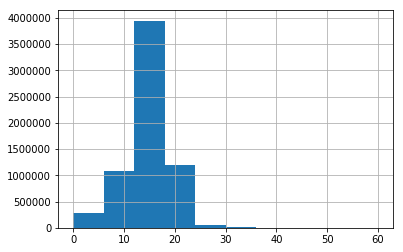

In [85]:
data.tip_percent.hist()

In [27]:
data.tip_percent.max()

60.0

In [86]:
b = [0,5,10,15,20,25,60]
l = [0,1,2,3,4,5]

In [87]:
data["tip_percent"] = pd.cut(data["tip_percent"], bins=b, labels=l)

In [64]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,total_amount,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH,tip_percent
0,1,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,6.5,...,8.90,426,5,4,1,0,0,0,0,3
1,1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,8.5,...,11.40,540,4,4,1,0,0,0,0,3
2,1,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,11.5,...,14.00,899,5,4,1,0,0,0,0,2
3,1,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,7.5,...,10.20,403,5,4,1,0,0,0,0,3
4,1,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,6.0,...,8.75,383,5,4,1,0,0,0,0,3


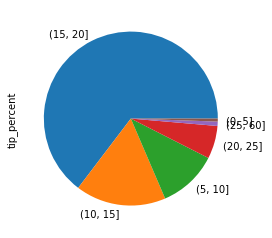

In [43]:
data.tip_percent.value_counts().plot.pie();

In [56]:
data.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
duration                int64
Location                int64
time_of_day             int64
CRD                     int64
UNK                     int64
NOC                     int64
DIS                     int64
CSH                     int64
tip_percent          category
tip_amount_binned    category
dtype: object

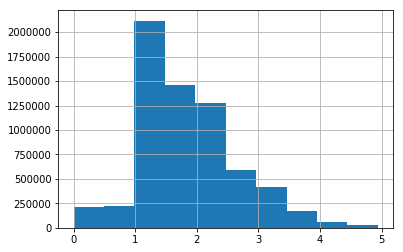

In [45]:
data.tip_amount.hist()

In [88]:
b = [0,0.5,1.0,1.5,2.0,2.5,3,3.5,4,5]
l= [0,1,2,3,4,5,6,7,8]
data["tip_amount_binned"] = pd.cut(data["tip_amount"], bins=b, labels=l)

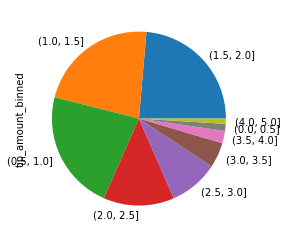

In [47]:
data.tip_amount_binned.value_counts().plot.pie();

In [66]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,duration,Location,time_of_day,CRD,UNK,NOC,DIS,CSH,tip_percent,tip_amount_binned
0,1,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,6.5,...,426,5,4,1,0,0,0,0,3,2
1,1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,8.5,...,540,4,4,1,0,0,0,0,3,3
2,1,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,11.5,...,899,5,4,1,0,0,0,0,2,2
3,1,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,7.5,...,403,5,4,1,0,0,0,0,3,3
4,1,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,6.0,...,383,5,4,1,0,0,0,0,3,3


In [71]:
data.isnull().any(axis=0)

vendor_id            False
pickup_datetime      False
dropoff_datetime     False
passenger_count      False
trip_distance        False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
fare_amount          False
surcharge            False
mta_tax              False
tip_amount           False
tolls_amount         False
total_amount         False
duration             False
Location             False
time_of_day          False
CRD                  False
UNK                  False
NOC                  False
DIS                  False
CSH                  False
tip_percent          False
tip_amount_binned    False
dtype: bool

In [89]:
data.tip_percent.fillna(0, inplace=True)
data.tip_amount_binned.fillna(0, inplace=True)

In [90]:
data.to_csv("data/taxi_FINAL_FINAL.csv", index=False)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime','dropoff_datetime','total_amount','mta_tax','tip_percent','tip_amount_binned']), data['tip_amount_binned'], test_size=0.30, random_state=1)